In [1]:
using Pkg
venv_dir = (@__DIR__) * "/../../muc_venv"
Pkg.activate(venv_dir)

using Revise
using LinearAlgebra
using LaTeXStrings
using DelimitedFiles: readdlm
using Interpolations
using PythonPlot
using NaturallyUnitful

rc("font", family="serif", serif="Computer Modern", size=14)
rc("figure", autolayout=true)
rc("axes", labelsize=16, unicode_minus=false)
rc("text", usetex=true)
rc("text.latex", preamble=raw"\usepackage{slashed}")

golden_ratio = (1+sqrt(5))/2
to_cm_ns = ustrip(unnatural(u"cm*ns^-1", 1))
GeV_to_ns = ustrip(unnatural(u"ns", 1*u"GeV^-1"))
ccms = ustrip(unnatural(u"cm*s^-1", 1))

DATA_DIR = "./boltz_outs/"
;

  Activating project at `~/Dropbox (University of Oregon)/research/flavorDM2/Aria/muc_venv`


In [14]:
mφ_for_bounds = readdlm(DATA_DIR*"mphi_for_mchi_bounds.csv")[:]
mχ_upper = readdlm(DATA_DIR*"mchi_uppers.csv")[:]

mphi = readdlm(DATA_DIR*"mphis_grid.csv")[:]
mchi = readdlm(DATA_DIR*"mchis_grid.csv")[:]
# Γ_φm = readdlm(DATA_DIR*"LL_phim_totwidth_GeV.csv")
BR_qchi = readdlm(DATA_DIR*"phiu_br_qchi.csv")./2
BR_phidev = readdlm(DATA_DIR*"phiu_br_phidenu.csv")
# BR_phi0muv = readdlm(DATA_DIR*"LL_phim_BR_phi0muv.csv")
BRs = @views [BR_qchi, BR_phidev]
;

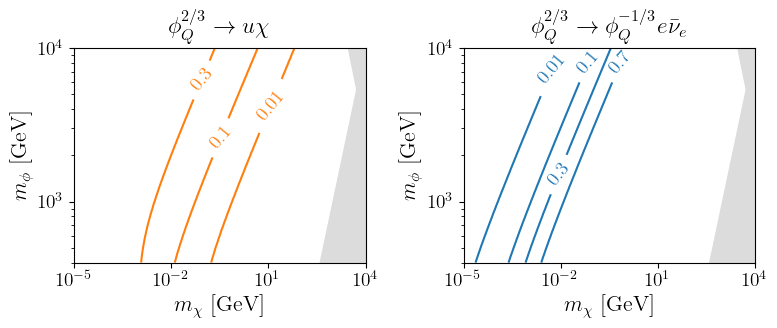

In [21]:
fig, axs = subplots(1,2,figsize=(8,3.5))

# levels = 0.1:0.2:0.7
levels = [0.01, 0.1, 0.3, 0.7]

ftitles = [L"\phi_Q^{2/3} \to u \chi", L"\phi_Q^{2/3} \to \phi_Q^{-1/3} e \bar{\nu}_e"]

colors = ["tab:orange", "tab:blue", "tab:red"]

for i in 1:2
    # BR_plot = BRs[i][:,:]
    # for i in eachindex(mphi)
    #     t = @view BR_plot[i,:]
    #     u = t[[!isnan(x) for x in t]]
    #     t[isnan.(t)] .= u[end]
    # end

    # C1 = axs[i-1].pcolormesh(mchi, mphi, BR_plot, vmin=0.0, vmax=0.9)
    C1 = axs[i-1].contour(mchi, mphi, BRs[i], colors=colors[i], levels=levels)

    axs[i-1].fill_betweenx(mφ_for_bounds, mχ_upper, 1e4, color="gainsboro", zorder=2)

    axs[i-1].set_xscale("log")
    axs[i-1].set_yscale("log")

    formatter(l) = L"%$(l)"

    clabel(C1, fmt=formatter, inline_spacing=0.1)
    # colorbar(C1)

    axs[i-1].set_xlim(1e-5, 1e4)
    axs[i-1].set_ylim(4e2, 1e4)

    axs[i-1].set_xlabel(L"$m_\chi$ [GeV]")
    axs[i-1].set_ylabel(L"$m_\phi$ [GeV]")

    axs[i-1].set_title(ftitles[i], pad=10.0)
end
# grid(alpha=0.3)

plotclose()
fig.savefig("Q_BR_contours.pdf", bbox_inches="tight")
fig